In [1]:
%matplotlib inline
#%matplotlib widget

In [2]:
#############imports######################################################################
import cv2 as cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import trackpy as tp
import scipy as sc
import matplotlib.colors as colors
import os
from ipywidgets import HBox, Textarea, interact

In [3]:
def read_time(time_value):
    fps=25
    sign_index=time_value.index(':')
    minutes=int(time_value[0:sign_index])
    sec=int(time_value[sign_index+1:len(time_value)])
    frames=(minutes*60+sec)*25
    return frames
#def expShift(t,A,tau,k):
#    return A*np.exp(-t/tau)+k
def expShift(t,A,tau,k):
    return A*np.exp(-(t**2)/((tau**2)))+k
#def CovToCorr(cov_data):
#    shape=cov_data.shape
#    result=[]
#    for i in range(0,shape):
def powerlaw(x,A,n):
    return A*x**n
def linear_fit_log(x,n,A):
    return n*x+A
    

In [4]:
expSumFileNamePassive='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\expSumPack21_updated.csv'
expSumPassive=pd.read_csv(expSumFileNamePassive,index_col=0)
all_linked_data_filename='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged\\all_linking_passive_data_21bots.csv'
all_linked_data=pd.read_csv(all_linked_data_filename,index_col=0)
passive_path='C:\\Users\\User\\Documents\\Eden\\locate_git_code\\packaged'
delta_t=60#6 #seconds
starting_time=100#seconds
ending_time=600#160#sec
velocity_data=pd.DataFrame()
for index,row in expSumPassive.iterrows():
    FileName=row.linkingFileNamePack
    print(FileName)
    data=all_linked_data[(all_linked_data['Filename']==FileName)]
    data=data.iloc[(starting_time*25):(ending_time*25),0:4]
    #data=data.iloc[:,0:4]
    #first_line=data.iloc[0,:]
    #first_line=data.iloc[0,:]
    #raw_diff=data-first_line
    #time=data.frame/25
    raw_diff=data.diff(periods=25*delta_t)
    #print(len(raw_diff.x))
    #delta_r=np.sqrt(np.power(raw_diff.x,2)+np.power(raw_diff.y,2))
    row_data=pd.DataFrame()
    row_data['FileName']=[FileName]*len(raw_diff)
    row_data['Bot_Type']=[row.bottype]*len(raw_diff)
    row_data['diameter']=[row['passiveDiameter[cm]']]*len(raw_diff)
    delta_time=[delta_t]*len(raw_diff)
    #delta_time=delta_t
    #print(delta_time)
    row_data['delta_Vx(per_1sec)']=np.array(raw_diff.x/delta_time)
    row_data['delta_Vy(per_1sec)']=np.array(raw_diff.y/delta_time)
    velocity_data=pd.concat([velocity_data,row_data],axis=0,ignore_index=True)
print(velocity_data)
velocity_data.to_csv(passive_path+'\\data_velocity(per_1sec)_histogram_21_bots_test.csv')

aligner_N021_D007_C0548.MP4_link.csv
aligner_N021_D007_C0547.MP4_link.csv
aligner_N021_D007_C0544.MP4_link.csv
aligner_N021_D007_C0542.MP4_link.csv
fronter_N021_D007_C0541.MP4_link.csv
fronter_N021_D007_C0540.MP4_link.csv
fronter_N021_D007_C0539.MP4_link.csv
fronter_N021_D007_C0538.MP4_link.csv
fronter_N021_D012_C0537.MP4_link.csv
fronter_N021_D012_C0536.MP4_link.csv
fronter_N021_D012_C0535.MP4_link.csv
fronter_N021_D012_C0534.MP4_link.csv
fronter_N021_D012_C0533.MP4_link.csv
aligner_N021_D012_C0532.MP4_link.csv
aligner_N021_D012_C0531.MP4_link.csv
updated_test_aligner_N021_D012_C0530.MP4_link.csv
aligner_N021_D012_C0529.MP4_link.csv
updated_test_aligner_N021_D018_C0527.MP4_link.csv
aligner_N021_D018_C0526.MP4_link.csv
aligner_N021_D018_C0525.MP4_link.csv
aligner_N021_D018_C0523.MP4_link.csv
fronter_N021_D018_C0521.MP4_link.csv
fronter_N021_D018_C0519.MP4_link.csv
fronter_N021_D018_C0514.MP4_link.csv
fronter_N021_D018_C0516.MP4_link.csv
fronter_N021_D018_C0517.MP4_link.csv
fronter_N021

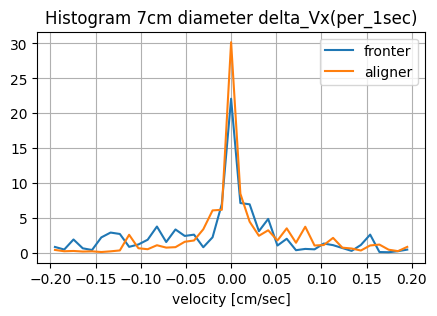

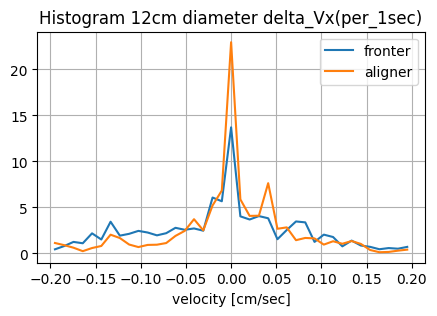

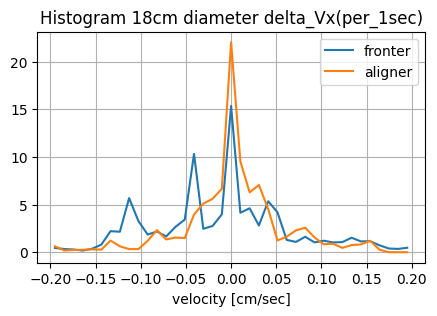

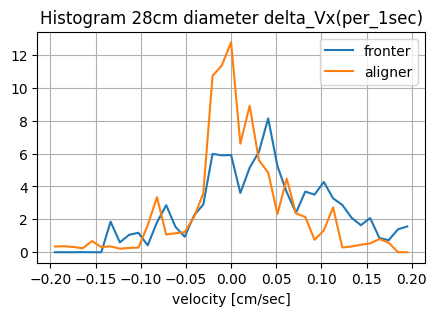

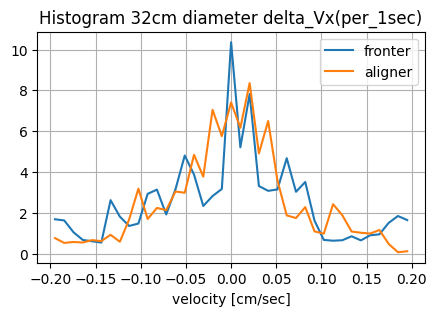

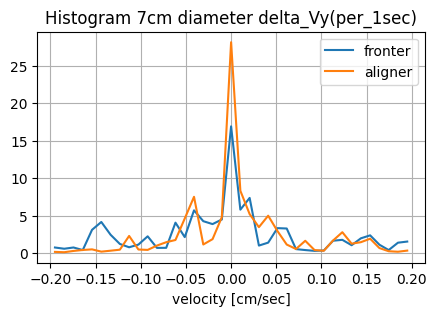

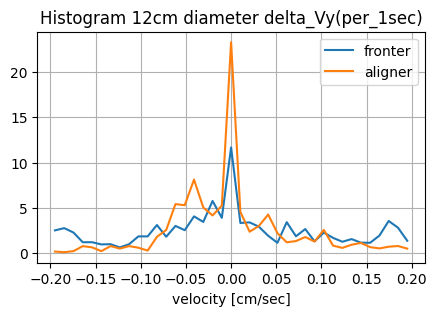

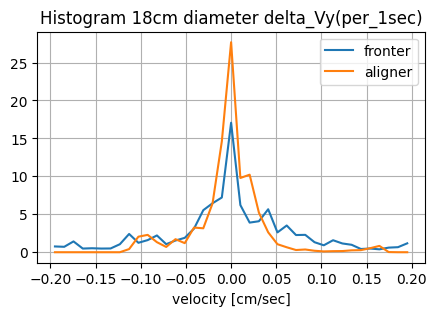

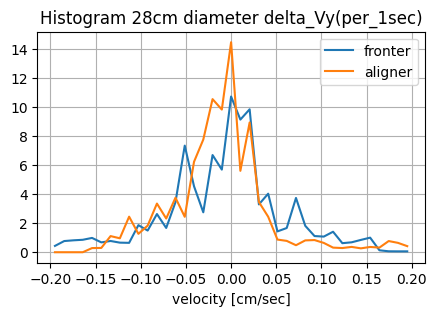

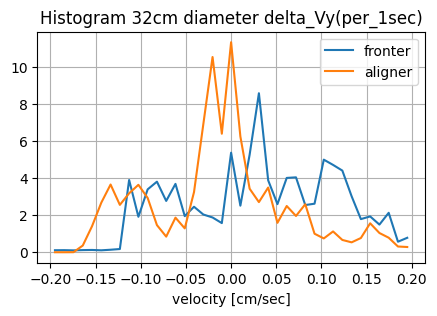

In [5]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
columns=['delta_Vx(per_1sec)','delta_Vy(per_1sec)']
#bins = np.arange(-.5,.5,.05)
bins = np.linspace(-0.2,.2,40)#arange(-.5,.5,.05)
#fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
#plt.subplots_adjust(hspace=0.5)
#fig.suptitle("velocity histograms", fontsize=18, y=0.95)
for column in columns:
    for diameter in diameters:
        fig, ax = plt.subplots(1,1, figsize=(5, 3))
        for bottype in bottypes:
            relevant_data=velocity_data[((velocity_data['Bot_Type']==bottype)&(velocity_data['diameter']==diameter))] 
            relevant_data=relevant_data[column]*mpp
            counts, xedges=np.histogram(relevant_data,bins=bins,density=True)
            xcenters = (xedges[:-1] + xedges[1:]) / 2
            
            cond = counts !=0
            xC = xcenters[cond]
            countsC = counts[cond]
            ax.plot(xcenters,counts,label=bottype)
            #ax.plot(xC,countsC,label=bottype)
            #ax.hist(relevant_data,bins=bins,label=bottype,alpha=0.5)
        ax.set_title("Histogram {}cm diameter {}".format(diameter,column))
        ax.legend()
        #ax.axis([0,15,0,5000])
        ax.set_xlabel("velocity [cm/sec]")
        ax.grid()

0.13761467889908258


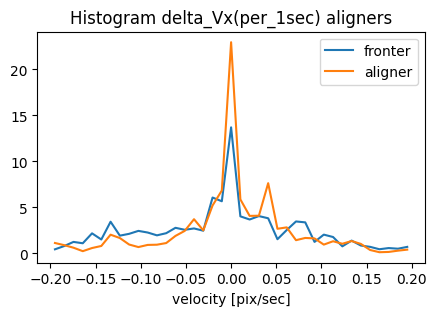

In [6]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2
print(mpp)
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
columns=['delta_Vx(per_1sec)','delta_Vy(per_1sec)']
alpha=[1,0.8,0.5,0.3,0.3]
#fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
#plt.subplots_adjust(hspace=0.5)
#fig.suptitle("velocity histograms", fontsize=18, y=0.95)
fig, ax = plt.subplots(1,1, figsize=(5, 3))
#bins = np.arange(-1,1,.05)
bins = np.linspace(-0.2,.2,40)
for column in ['delta_Vx(per_1sec)']:
    for bottype in bottypes:
        
        for diameter in [12]:
            relevant_data=velocity_data[((velocity_data['Bot_Type']==bottype)&(velocity_data['diameter']==diameter))] 
            relevant_data=relevant_data[column]*mpp
            counts, xedges=np.histogram(relevant_data,bins=bins,density=True)
            xcenters = (xedges[:-1] + xedges[1:]) / 2
            ax.plot(xcenters,counts,label=bottype)
            #ax.hist(relevant_data,bins=bins,label=bottype,alpha=alpha[4],density=True)
        ax.set_title("Histogram {} {}s".format(column,bottype))
        ax.legend()
        #ax.axis([0,15,0,5000])
        ax.set_xlabel("velocity [pix/sec]")

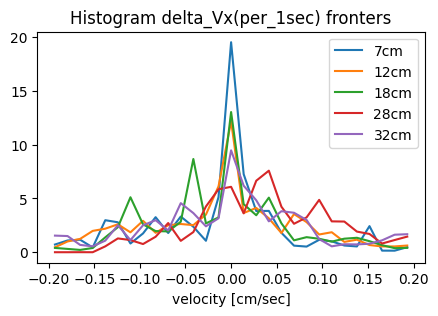

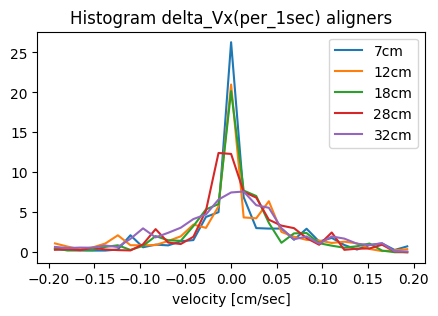

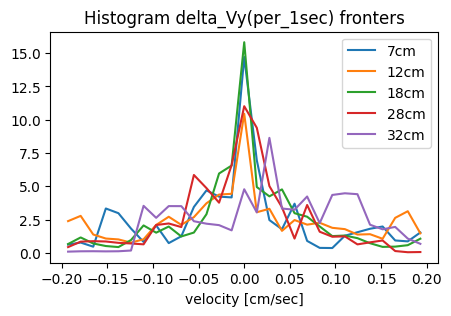

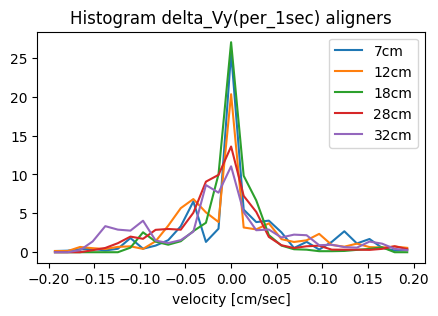

In [7]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
columns=['delta_Vx(per_1sec)','delta_Vy(per_1sec)']
#alpha=[1,0.8,0.5,0.3,0.3]
#fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))
#plt.subplots_adjust(hspace=0.5)
#fig.suptitle("velocity histograms", fontsize=18, y=0.95)

#bins = np.arange(-0.2,.2,40)
bins = np.linspace(-0.2,.2,30)
for column in columns:
    for bottype in bottypes:
        fig, ax = plt.subplots(1,1, figsize=(5, 3))
        for diameter in range(0,len(diameters)):
            relevant_data=velocity_data[((velocity_data['Bot_Type']==bottype)&(velocity_data['diameter']==diameters[diameter]))] 
            relevant_data=relevant_data[column]*mpp
            counts, xedges=np.histogram(relevant_data,bins=bins,density=True)
            xcenters = (xedges[:-1] + xedges[1:]) / 2
            ax.plot(xcenters,counts,label="{}cm".format(diameters[diameter]))
            #counts, bins=ax.hist(relevant_data,bins=bins,label="{}cm".format(diameters[diameter]),alpha=alpha[diameter],density=True)
        ax.set_title("Histogram {} {}s".format(column,bottype))
        ax.legend()
        #ax.axis([0,15,0,5000])
        ax.set_xlabel("velocity [cm/sec]")

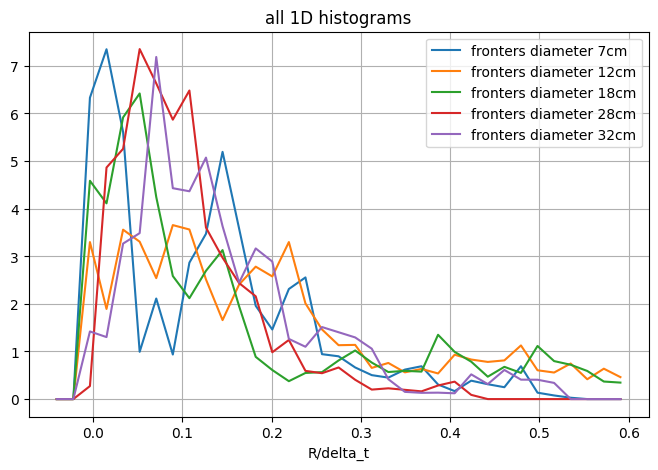

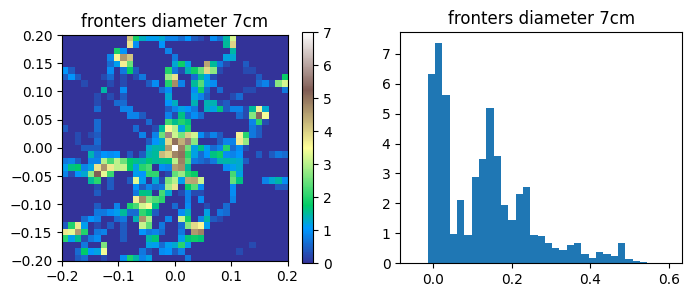

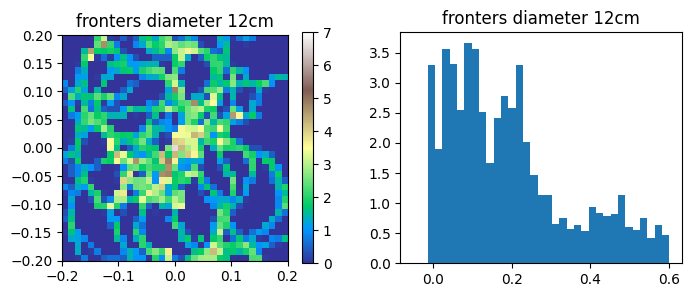

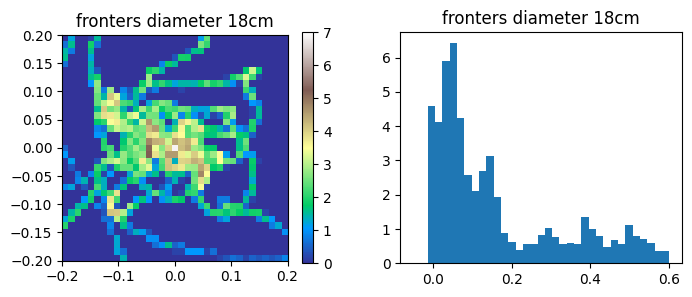

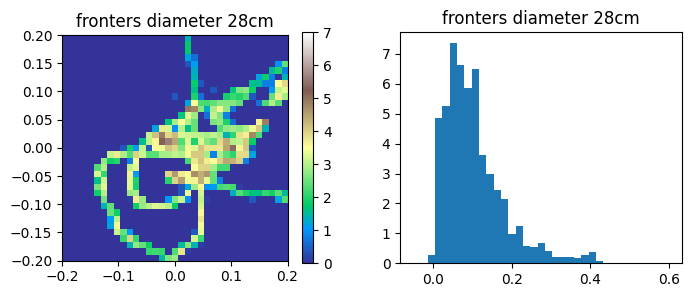

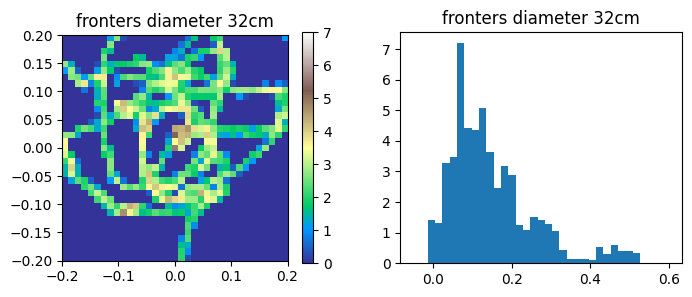

In [8]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2
bottypes=['fronter']#,'aligner']
diameters=[7,12,18,28,32]
alpha=[1,0.5]
#bins = np.linspace(-.1,.1,10)
#bins = np.linspace(-0.2,.2,36)
bins = np.linspace(-.2,.2,36)
bins_hist= np.linspace(-0.05,.6,36)
fig, (ax3)= plt.subplots(1,1,figsize=(8, 5))
ax3.set_title('all 1D histograms')
for bottype in bottypes:
    if bottype=='fronter':
        v_min=0
        #v_max=1200
        v_max=7
    elif bottype=='aligner':
        v_min=0
        #v_max=1700
        v_max=7
    for diameter in range(0,len(diameters)):
        fig, (ax1,ax2)= plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
        relevant_data=velocity_data[((velocity_data['Bot_Type']==bottype)&(velocity_data['diameter']==diameters[diameter]))] 
        data=relevant_data.iloc[:,3:5]*mpp
        H,xedges,yedges=np.histogram2d(data.iloc[:,0],data.iloc[:,1],bins=bins,density=True)
        H=H.T
        index=np.where(H==0)
        H[index]=1
        pic=ax1.imshow(np.log(H), interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],cmap='terrain',vmin=v_min,vmax=v_max)
        plt.colorbar(pic)
        R_velocity=np.sqrt(np.power(data.iloc[:,0],2)+np.power(data.iloc[:,1],2))
        ax2.hist(R_velocity,bins=bins_hist,density=True)
        counts1D, xedges1D=np.histogram(R_velocity,bins=bins_hist,density=True)
        xcenters1D = (xedges1D[:-1] + xedges1D[1:]) / 2
        ax3.plot(xcenters1D,counts1D,label="{}s diameter {}cm".format(bottype,diameters[diameter]))
        #print(np.log(H))
        #counts=H
        #print(index)
        #h=ax.hist2d(data.iloc[:,0],data.iloc[:,1],bins=bins,label="{}cm".format(diameters[diameter]),density=True,cmap='terrain'
        #           ,vmin=v_min,vmax=v_max)
        #fig.colorbar(h[3], ax=ax)
        ax1.set_title("{}s diameter {}cm".format(bottype,diameters[diameter]))
        ax2.set_title("{}s diameter {}cm".format(bottype,diameters[diameter]))
ax3.set_xlabel('R/delta_t')
ax3.legend()
ax3.grid()

In [9]:
(0.6/36)*14

0.23333333333333334

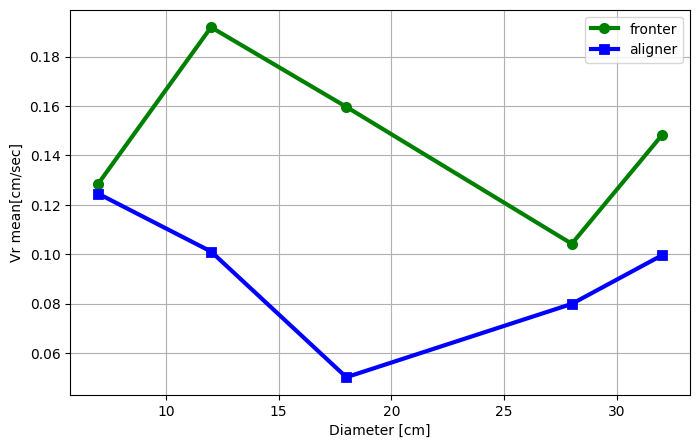

In [10]:
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2
bottypes=['fronter','aligner']
diameters=[7,12,18,28,32]
alpha=[1,0.5]
#bins = np.linspace(-.1,.1,10)
saved_data=pd.DataFrame(data={'diameters':diameters})
bins = np.linspace(-0.2,.2,36)
fig, ax= plt.subplots(1,1,figsize=(8, 5))
for bottype in bottypes:
    mean_v_array=[]
    std_v_array=[]
    for diameter in range(0,len(diameters)):
        relevant_data=velocity_data[((velocity_data['Bot_Type']==bottype)&(velocity_data['diameter']==diameters[diameter]))] 
        data=relevant_data.iloc[:,3:5]*mpp
        R_velocity=np.sqrt(np.power(data.iloc[:,0],2)+np.power(data.iloc[:,1],2))
        counts1D, xedges1D=np.histogram(R_velocity,bins=bins_hist,density=True)
        xcenters1D = (xedges1D[:-1] + xedges1D[1:]) / 2
        mean_v=np.sum(counts1D*xcenters1D*(bins_hist[1]-bins_hist[0]))
        #std_v=np.std(counts1D*xcenters1D)
        mean_v_array.append(mean_v)
    saved_data[bottype]=mean_v_array
    if bottype=='fronter':
        ax.plot(diameters,mean_v_array,label=bottype,marker='o',color='green'
             ,markeredgewidth=2,linewidth=3)#,yerr=std_v/2)
    elif bottype=='aligner':
        ax.plot(diameters,mean_v_array,label=bottype,marker='s',color='blue'
             ,markeredgewidth=2,linewidth=3)
ax.legend()
ax.grid()
ax.set_xlabel('Diameter [cm]')
ax.set_ylabel('Vr mean[cm/sec]')
#ax.set_title('Vr mean[cm/sec] Vs. Diameter [cm]- from histogram')
saved_data.to_csv('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\histogram_mean_Vr_vs_diameter_21bots.csv')
fig.savefig('C:\\Users\\User\\Documents\\Eden\\locate_git_code\\production\\histogram_mean_Vr_vs_diameter_21bots.png',bbox_inches='tight')

In [11]:
np.sum(counts1D*(bins_hist[1]-bins_hist[0]))

1.0

In [ ]:
fig,ax2= plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
row=expSumPassive.iloc[38]
FileName=row.linkingFileNamePack
print(FileName)
traj_data=pd.read_csv(passive_path+'\\'+FileName)
rel_traj_data=traj_data.iloc[(starting_time*25):(ending_time*25)]
rel_traj_data=traj_data-traj_data.iloc[0]
#traj_data=traj_data.iloc[(starting_time*25):(ending_time*25),0:4]
print(rel_traj_data)
relevant_data=velocity_data[(velocity_data['FileName']==FileName)]
data=relevant_data.iloc[:,3:5]*mpp
R_velocity=np.sqrt(np.power(data.iloc[:,0],2)+np.power(data.iloc[:,1],2))
ax2.hist(R_velocity,bins=bins_hist,density=True)
ax2.set_title(FileName)
inset_axes = ax2.inset_axes([0.7,0.7,0.3,0.3])
inset_axes.set_xlim(-80,80)
inset_axes.set_ylim(-80,80)
tp.plot_traj(rel_traj_data,ax=inset_axes,mpp=mpp)
inset_axes.grid()

fronter_N021_D032_C0500.MP4_link.csv
         frame  frame.1      x      y    r  particle
0          0.0      0.0    0.0    0.0  0.0       0.0
1          1.0      1.0    0.0    0.0  0.0       0.0
2          2.0      2.0    0.0    0.0  0.0       0.0
3          3.0      3.0    0.0    0.0  0.0       0.0
4          4.0      4.0    0.0    0.0  0.0       0.0
...        ...      ...    ...    ...  ...       ...
14803  14803.0  14803.0  162.0  370.0 -3.4       0.0
14804  14804.0  14804.0  162.0  370.0 -3.3       0.0
14805  14805.0  14805.0  162.0  370.0 -3.3       0.0
14806  14806.0  14806.0  162.0  370.0 -3.3       0.0
14807  14807.0  14807.0  162.0  370.0 -3.3       0.0

[14808 rows x 6 columns]


C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:6679: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:6680: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:6679: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\axes\_axes.py:

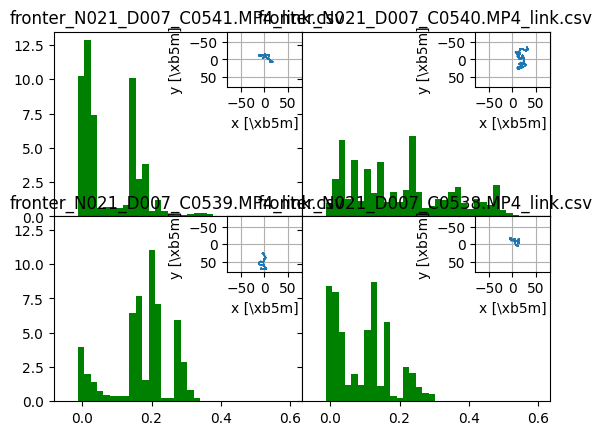

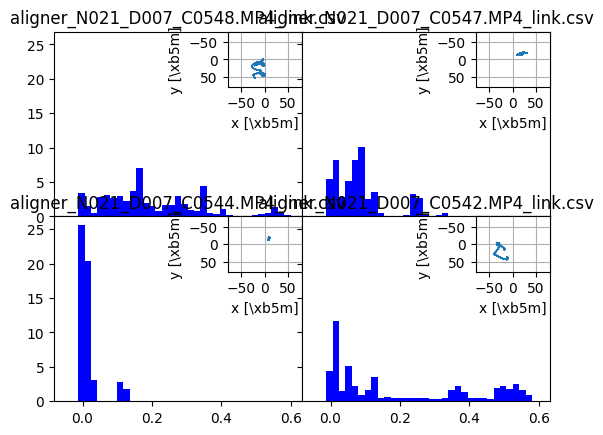

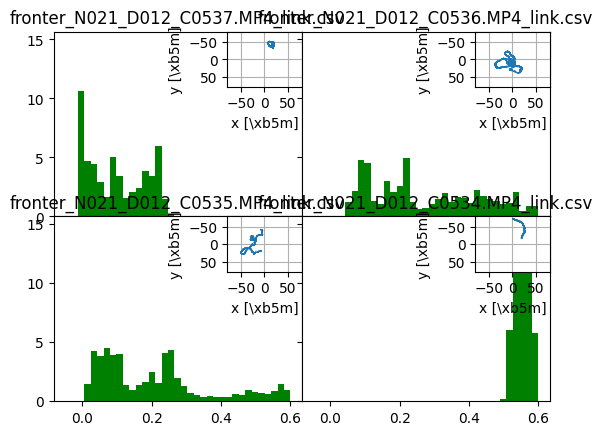

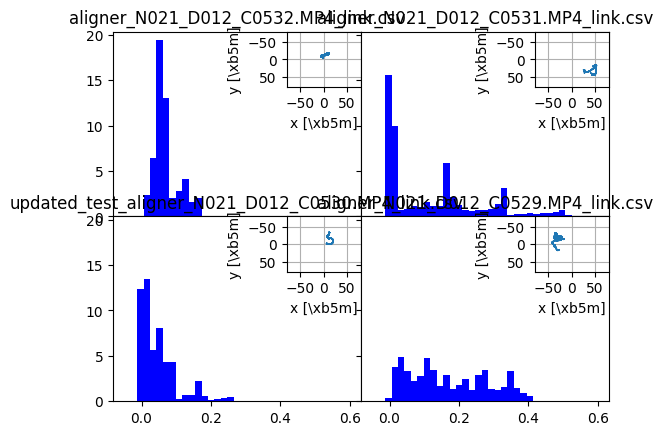

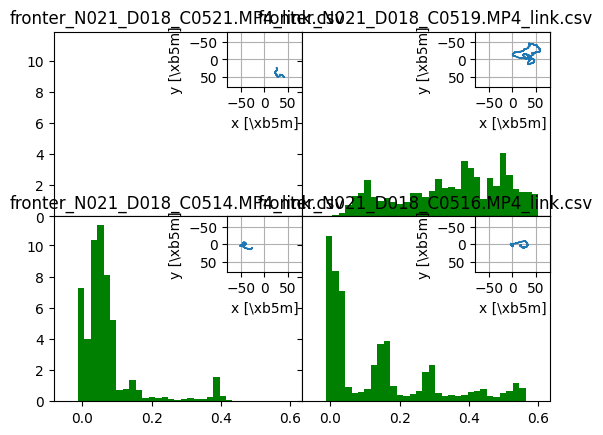

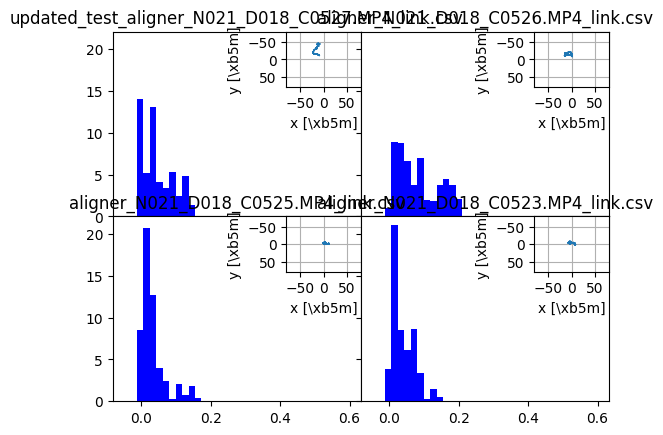

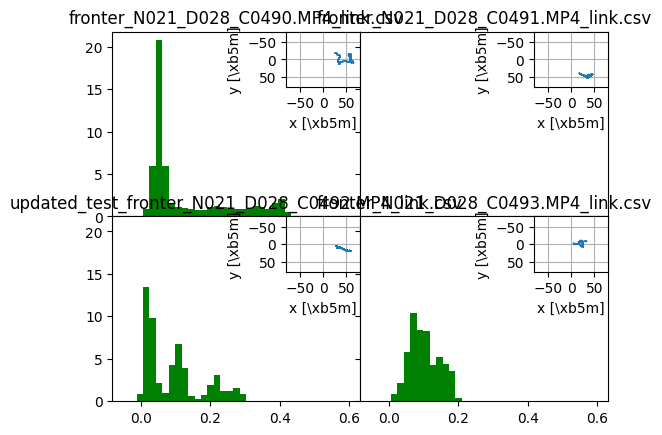

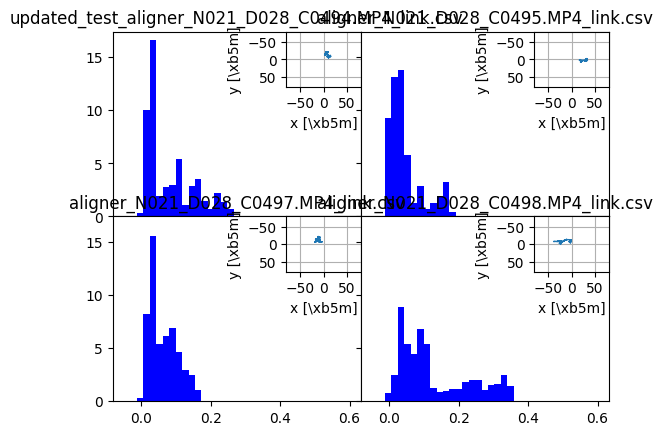

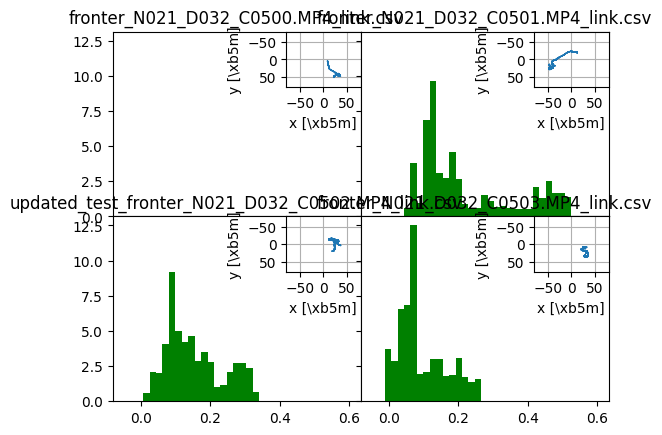

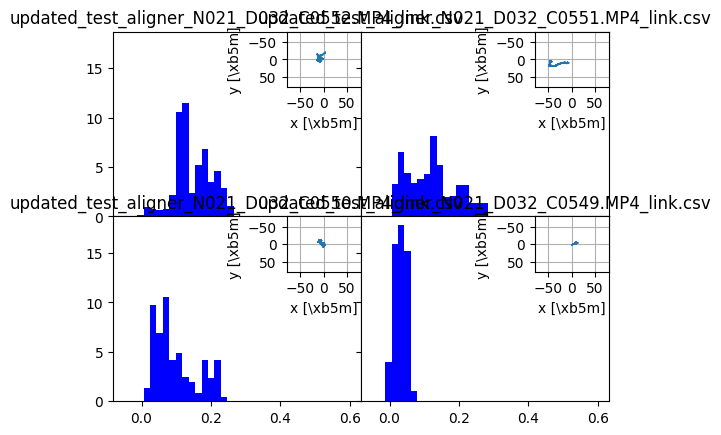

In [14]:
diameters=[7,12,18,28,32]
bottypes=['fronter','aligner']
alignerColor = 'b'
fronterColor = 'g'
arenaSizePixels = 1090 # [pixels]
arenaSizeCm = 150 # [cm]
fps =25
mpp = arenaSizeCm/arenaSizePixels#/2 #[cm/pixel]
for diameter in diameters:
    for bottype in bottypes:
        relevant_exp=expSumPassive[((expSumPassive['passiveDiameter[cm]']==diameter)&(expSumPassive['bottype']==bottype))]
        fig = plt.figure()
        gs = fig.add_gridspec(nrows=2, ncols=2, hspace=0, wspace=0)
        ax= gs.subplots(sharex=True, sharey=True)
        index=0
        for exp in range(0,4):
        #for exp in range(0,len(relevant_exp)):
        #or index,row in expSumPassive.iterrows():
            row=relevant_exp.iloc[index]
            FileName=row['linkingFileNamePack']
            #if ('C0535' in FileName) or ('C0519' in FileName):
             #   continue
            traj_data=pd.read_csv(passive_path+'\\'+FileName)
            rel_traj_data=traj_data-traj_data.iloc[0]
            rel_traj_data=rel_traj_data.iloc[(starting_time*25):(ending_time*25)]
            #etraj_data-traj_data.iloc[0]
            relevant_data=velocity_data[(velocity_data['FileName']==FileName)]
            data=relevant_data.iloc[:,3:5]*mpp
            R_velocity=np.sqrt(np.power(data.iloc[:,0],2)+np.power(data.iloc[:,1],2))
            i = int(index/2)
            j = index%2
            current_ax=ax[i,j]
            if bottype =='aligner':
                color = alignerColor
            elif bottype =='fronter':
                color = fronterColor
            current_ax.hist(R_velocity,bins=bins_hist,density=True,color=color)
            current_ax.set_title(FileName)
            inset_axes = current_ax.inset_axes([0.7,0.7,0.3,0.3])
            inset_axes.set_xlim(-80,80)
            inset_axes.set_ylim(-80,80)
            tp.plot_traj(rel_traj_data,ax=inset_axes,mpp=mpp)#,plot_style={'color':color})
            inset_axes.grid()
            index=index+1
    #p.plot_traj(rel_traj_data,ax=inset_axes,mpp=mpp)